<a href="https://colab.research.google.com/github/StanleyLiangYork/2024_journal_club_Transformer_AI/blob/main/Implementation_self_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention mechanism

**What is an attention mechanism?**
When you try to understand a complex image or to translate a sentense from one language to another, you will instinctively focus on a specific parts of the image (e.g. to identify a object), or a keyword in the sentense that is crucial to your translation task. This selective focus is called attention. And we consider attention as **fundamental aspect** of human cognition. In deep learning, the neural network tries to mimic the selective process by some computational process, which is called attention mechanism.
<p>
To implement the attention mechanism in a neural network (NN), the model will be able to focus on different parts of the input data with varying degrees of importance. With the attention mechanism, the NN can assign different weights to each element in the input sequence, and highlight the elements that are most relevant to the in-hand task. The attention mechanism not only gives the NN the human-like ability of selective focus, but also improves the NN's ability to process and understand complex data.

# The strengths of Attension Mechanism



1.   Processing long sequence: conventional NN struggle with processing long sequences, the attension mechanism allows NN to focus on the relevant parts of the input, making them more effective at handling lengthy data.
2.   Contextual Understanding: The meaning of words depends on the context. Understanding the context of a word is crucial for accurate translation. Attention mechanisms enable models to consider the context by assigning different attention weights to each word in the input sequence.
3.   Performance improvement: NN with attention mechanism often outperforms the non-attention counterparts. It achieves state-of-the-art results in tasks like machine translation, image classification, and speech recognition.



**Closer look at self-attention** is an attention mechanism to relate different positions of a single sequence in order to compute a representation of the sequence.

**Math behind the attention mechanisms**

Given a sequence of four words: <word 1> <word 2> <word 3> <word 4>

We use 3-dimensional (i.e. three columns) vectors to represent each word. Then the four words can be represented by a matrix where each row corresponses to a word in the sequence (i.e. four rows).

## Matrices

 $B = \begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  1 & 1 & 0 \\
  0 & 0 & 1
 \end{bmatrix}$

 In the above $4 \times 3$ matrix, the number of rows matches with the length of the sequence, and the number of columns is equal to the embedding dimension. Note that the practical implementation use larger embedding.

 When we want to encode a sequence of two word with 4-dimentional embedding, we use three "weight metrics": WQ, WK and WV, to right-multiplied the embeddings of the two words. Note the weight metrics have column space of 3, thus they reduce the number of the word embedings from 4 to 3 in the outputs of Q (query), K (key), and V (value).


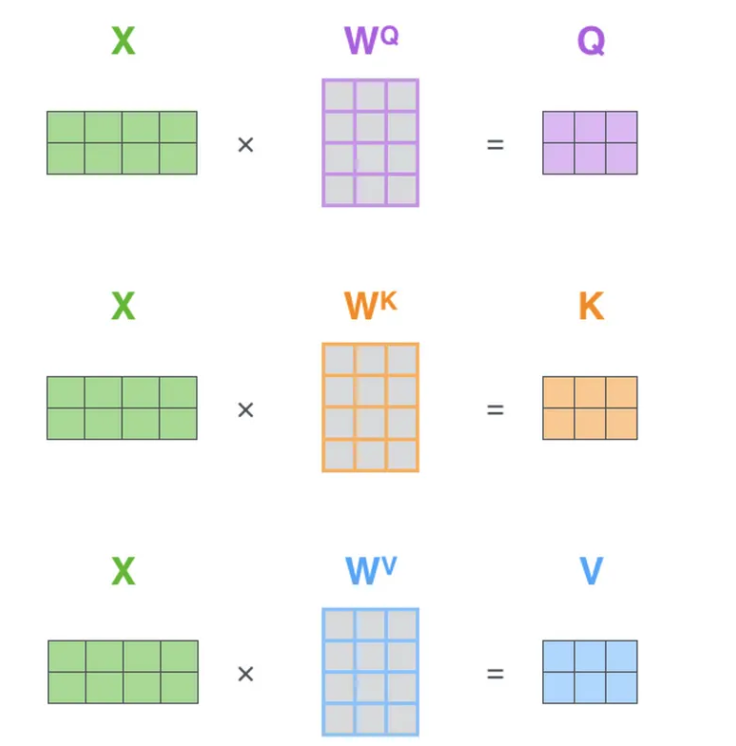

The weight matrices WQ, WK and WV are learnt during the training of the neural network. For example, we will randomly generate the weight matrices. The matrix size is 3x3 and the matrix elements are integers between 0 and 2:

 $W^Q = \begin{bmatrix}
  2 & 0 & 2 \\
  2 & 0 & 0 \\
  2 & 1 & 2
 \end{bmatrix}$

 $W^K = \begin{bmatrix}
   2 & 2 & 2 \\
   0 & 2 & 1 \\
   0 & 1 & 1
 \end{bmatrix}$

  $W^V = \begin{bmatrix}
   1 & 1 & 0 \\
   0 & 1 & 1 \\
   0 & 0 & 0
 \end{bmatrix}$

The Q (query), K (key), and V (value) matrice of the given sequence can be computed by:

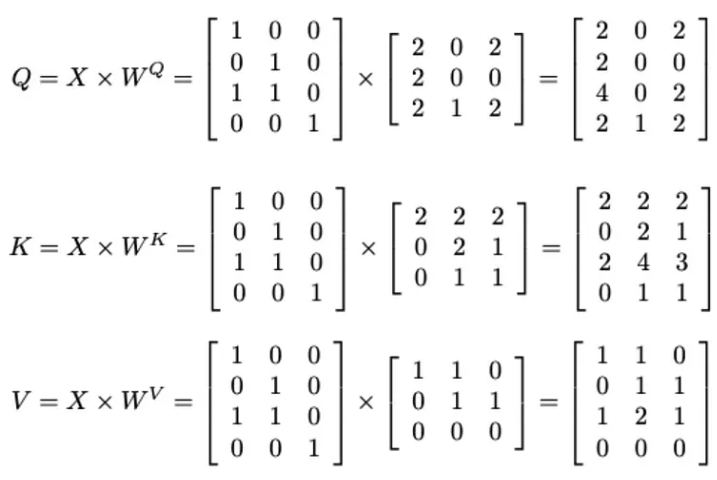



Note there is no reduction in dimensionality from these operations, because the example’s embedding dimension is 3. The derived matrices have 4 rows (as many as the words in the sequence) and 3 columns. (Note that the architecture in the original “Attention is All You Need” paper makes use of 64 columns.)


In the next step, we use the softmax function to compute the likelihood of the next word given the encoded Q, K, and V value.
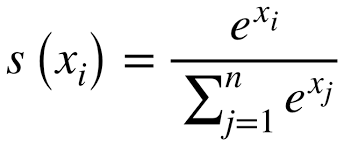

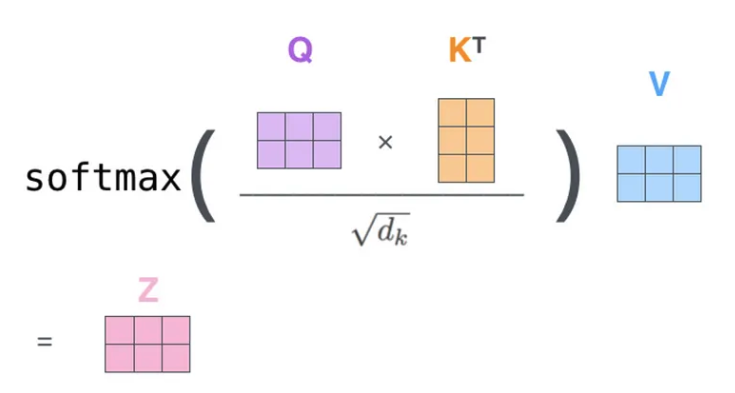

The Z matrix is the final output of the self-attention layer, and $d_K$ is the number of columns in the Q and K matrices (and equal to 3 in our example).

The dot product of the Q and the transposed K matrices are calculated as:

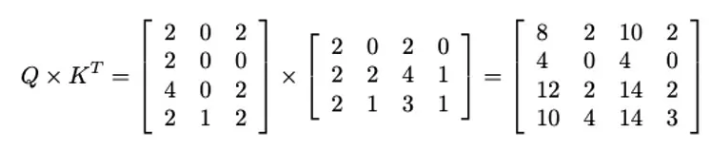

Larger values of the dot product mean that the vectors are pointing in the same direction, while smaller values mean that the vectors are closer to orthogonal. For example, the above result is telling us that the third row of the Q matrix is well aligned with the third row of the K matrix (value of 14), but not so well aligned with the fourth row of the K matrix (value of 2).

This result is scaled by the square root of the number of columns of K, and the softmax operation is then applied:

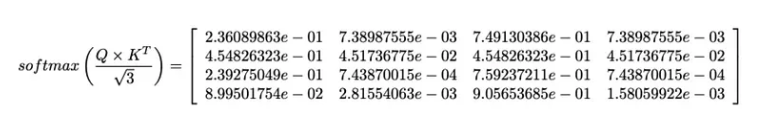

In the resulting matrix, the rows represent probability distributions, with their sums equal to 1. For example, when examining the third row and third column, the softmax operation has changed the value of 14 into the probability 7.59237211e-01. The value of 2 at the third row and fourth column has changed into 7.43870015e-04. As expected, smaller values produce smaller probabilities.

The last step is to multiply with the V matrix:

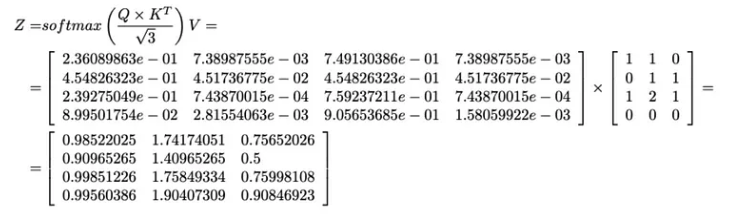

The above final output of self-attention returns a matrix with 4 rows (same as the number of words in the sequence) and 3 columns (same as the number of columns of the V matrix). Each row represents the context vector of a word. The context vector captures correlations between the corresponding word and other words in the sequence. This information is then fed to other layers of the model.

The attention mechanism is a layer in neural networks that allows for learning and modeling dependencies between distant positions in sequences. We can estimate the correleation of each two words by the dot product of the any two row vectors.

In [1]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax


# encoder representations (one-hot encoding) of four different words

word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])

# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])
# the words are represented by a 4-by-3 array, four rows for four words, each word represented by three numbers


In [2]:
# generate the weight matrices for Query, Key, and Value
# the Q, K, V are squared matrices with the shape of the # of features (size of the vocabulary)
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))

In [3]:
# generating the queries, keys and values
# taking the dot products
Q = words @ W_Q
K = words @ W_K
V = words @ W_V

In [4]:
# scoring the query vectors against all key vectors
scores = Q @ K.transpose()

In [5]:
# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)

In [6]:
# computing the attention by a weighted sum of the value vectors
# each word get its attention score, and the matrices restored to the original shape
attention = weights @ V

In [7]:
print(f"attention scores: {attention}")
print(f"word indices being attentioned: {attention.argmax(axis=1)}")
print(f"shape: {attention.shape}")

attention scores: [[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]
word indices being attentioned: [1 1 1 1]
shape: (4, 3)
